In [6]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, parameterimporter
from lowEBMs.Packages.Variables import variable_importer, Vars
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation

In [7]:
configuration=importer('EBM1D_Sellers_dynamic_config.ini')
variable_importer(configuration)
configuration,paras=add_sellersparameters(configuration,\
            parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
eq=configuration['eqparam']
rk=configuration['rk4input']
fun=configuration['funccomp']

Vars.T=ZMT[-1]
Time,ZMT,GMT=rk4alg(model_equation,eq,rk,fun)

Loading Configuration from: ../Config/EBM1D_Sellers_dynamic_config.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=25550), HTML(value='')))

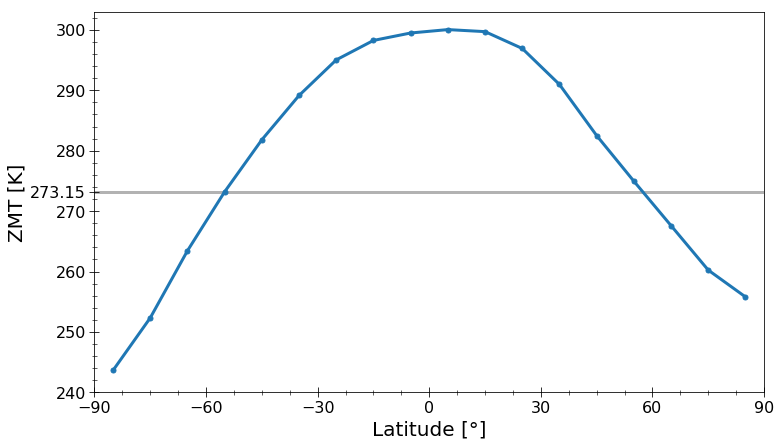

In [14]:
from lowEBMs import update_plotstyle
update_plotstyle()
from lowEBMs.Tutorials import plot_lat_temp
from lowEBMs.Packages.Functions import plotmeanstd
#plot_lat_temp(outputdata)
T=plotmeanstd(ZMT)
plt.figure(figsize=(12,7))
plt.plot(Vars.Lat,T[0],marker='.')
plt.xlabel('Latitude [Â°]'); plt.ylabel('ZMT [K]')
plt.xlim(-90,90); plt.ylim(240,303)
plt.hlines(273.15,xmin=-90,xmax=90,alpha=0.3)
plt.xticks(np.linspace(-90,90,7))
plt.yticks([240,250,260,270,273.15,280,290,300],[240,250,260,270,273.15,280,290,300])
plt.show()

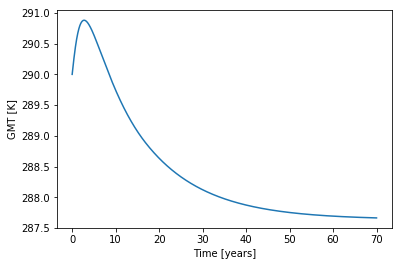

In [3]:
from lowEBMs.Tutorials import plot_time_temp

plot_time_temp([Time,ZMT,GMT])

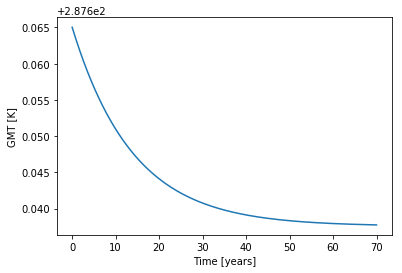

In [9]:
plot_time_temp([Time1[1:],ZMT1,GMT1[1:]])